In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
df = pd.read_csv('quikr_car.csv')

In [3]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
503,Hyundai Xcent Base 1.1 CRDi,Hyundai,2015,Ask For Price,"1,80,000 kms",Diesel
813,Tata Nano,Tata,2013,"60,000","7,000 kms",Petrol
595,Hyundai Eon Magna Plus,Hyundai,2013,"1,85,000","23,000 kms",Petrol
148,Honda Amaze,Honda,2015,"3,44,999","22,000 kms",Petrol
143,Volkswagen Jetta Highline TDI AT,Volkswagen,2014,"7,49,999","46,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
# are there any missing values
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

## quality of data provided

- price object to int
- price has string  ('Ask For Price')
- year contains object to int
- year also contain string data
- kms_driven object to int
-  kms_driven has 52 NAN values
- fuel_type contain nan values
- keep first 3 words of name

# cleaning

In [8]:
backup = df.copy()

In [9]:
df = df[df['year'].str.isnumeric()] 

In [10]:
df['year'] = df['year'].astype(int) # convert to int 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [12]:
df = df[df['Price']!= 'Ask For Price']  # removed all the rows containing string 

In [13]:
df['Price']  # it has ,

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [14]:
df['Price'] = df['Price'].str.replace(',','').astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [16]:
df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0) 

In [17]:
df['kms_driven'] = df['kms_driven'].str.replace(',','')

In [18]:
df = df[df['kms_driven'].str.isnumeric()]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


In [21]:
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int32(2), int64(1), object(3)
memory usage: 38.3+ KB


In [23]:
df = df[~df['fuel_type'].isna()] #~ excluding value containing na value

In [24]:
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [25]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int32(2), int64(1), object(3)
memory usage: 38.2+ KB


In [27]:
# data is cleaned
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


<AxesSubplot: >

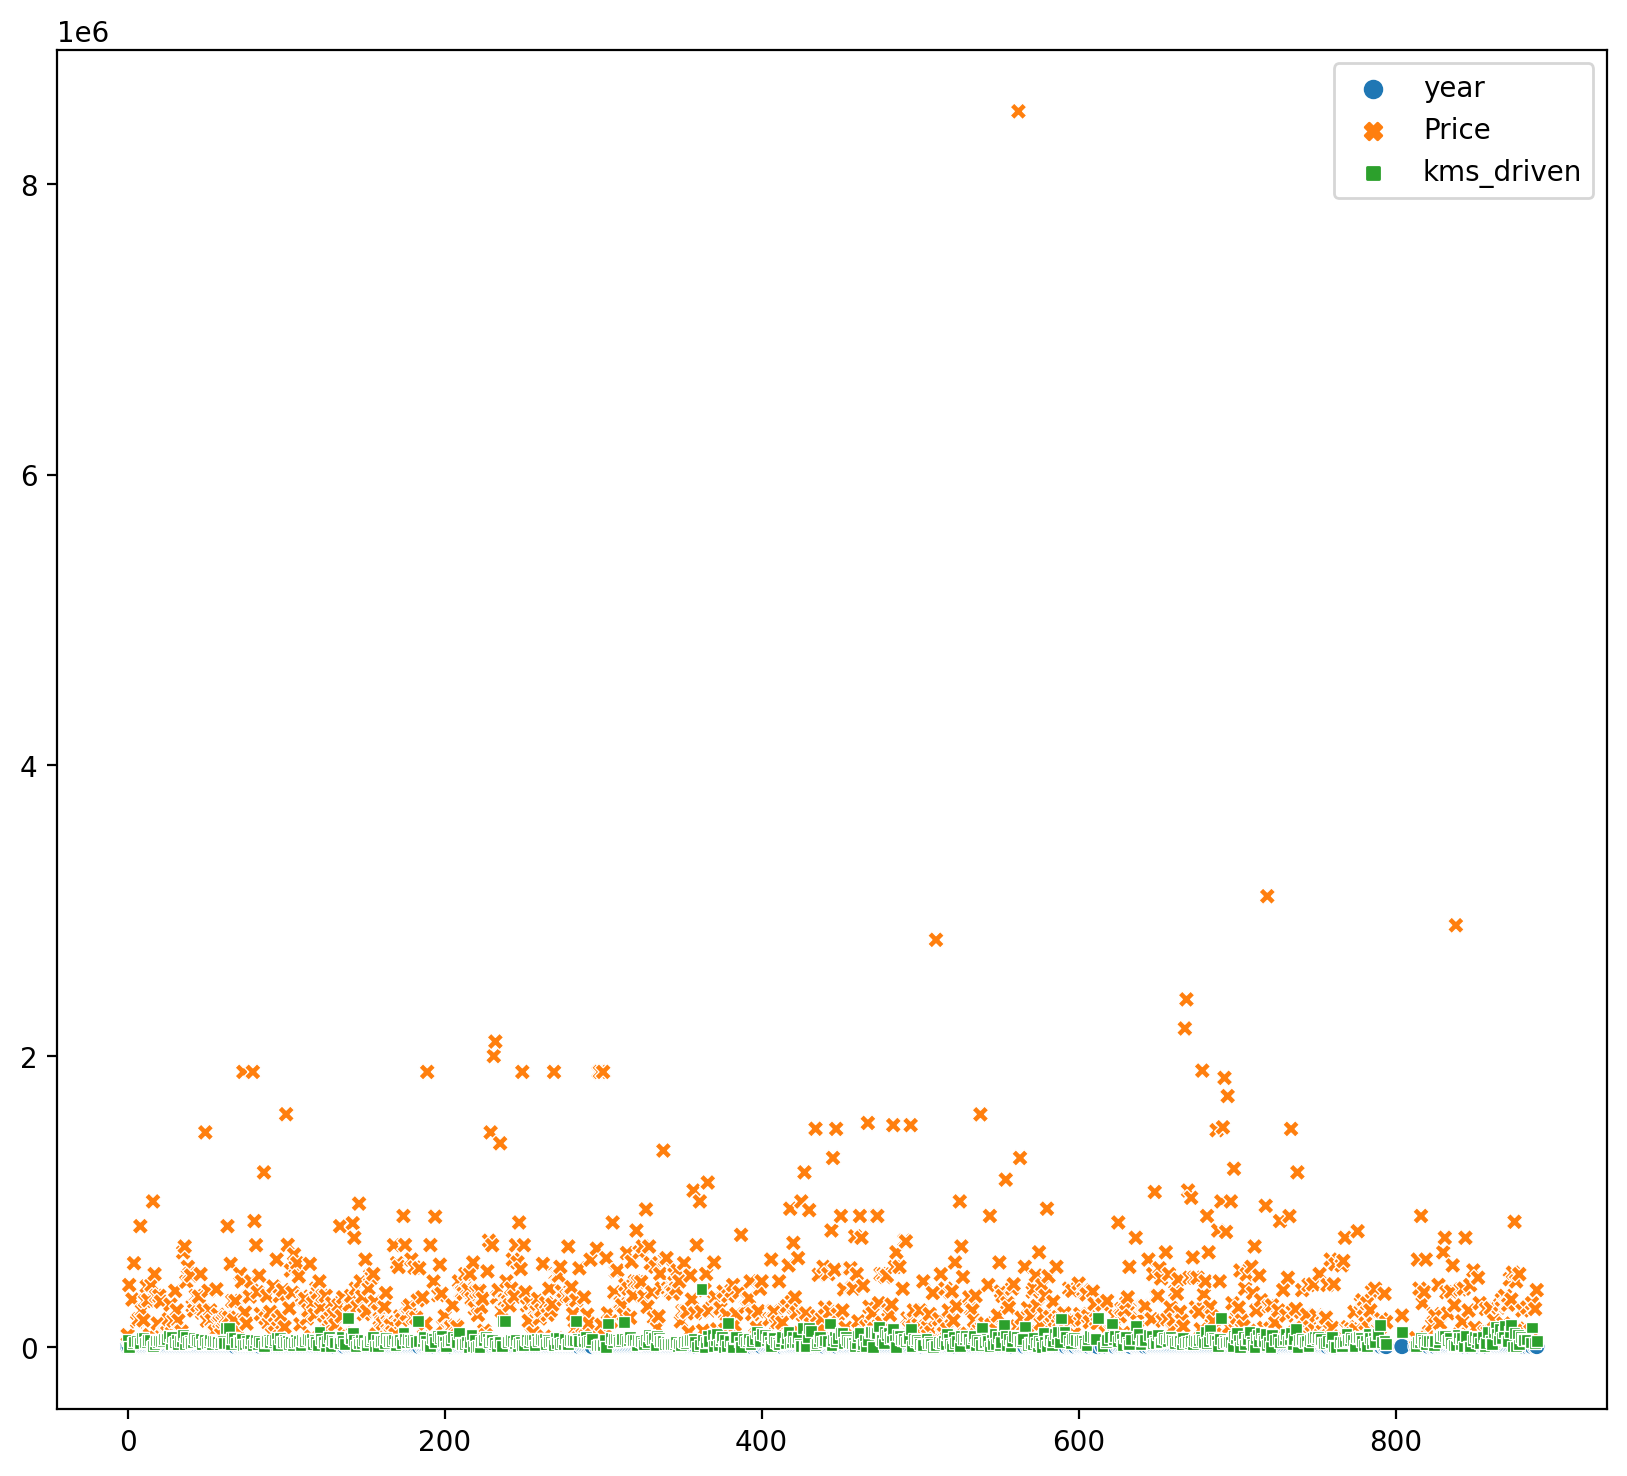

In [28]:
plt.figure(figsize=(10,9),dpi=200)
sns.scatterplot(data=df)

In [29]:
# we have one outlier 
df[df['Price']> 6000000]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [30]:
df = df[df['Price']< 6000000].reset_index(drop=True)

In [31]:
df[df['Price']> 6000000] # removed outlier

,name,company,year,Price,kms_driven,fuel_type


In [32]:
df.to_csv('Cleaned Car.csv')

In [33]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


# model

In [34]:
X= df.drop(columns='Price')
y = df['Price']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder


In [38]:
# onehot encoding for nominal data here car name

ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [46]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [39]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [47]:
col_transform = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                        remainder='passthrough')

In [48]:
lr = LinearRegression()

In [49]:
pipe = make_pipeline(col_transform,lr) 

In [50]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [51]:
y_pred = pipe.predict(X_test)

In [52]:
y_pred

array([  30246.79895278,  397704.19325051,  401625.98978851,
        477868.58047903,  397096.77353433,  450575.59857296,
         98514.06577616,  243745.81137322,  459637.70950469,
        199695.29902723,  382288.24877004,  328381.06131467,
        691356.41854417,  192082.09955197, 2036026.56604016,
        365191.70175921,  612853.22829909,  349799.53604848,
        943200.728177  ,  249079.03418966,  371026.55421843,
        121654.62188598,  458888.32969659,  603381.36261515,
        359218.06072827,  355403.59960454,  458897.84167931,
        732933.97628482,  368346.75479521,  605539.05844672,
        692368.08128511,  407541.88029189,  174777.41726096,
        128399.04015888,  577947.68152767,  193104.05625543,
        382453.48524363,  634764.44007341,  486725.07259224,
        657115.85610198,  254799.59817617,  469406.20814108,
        -50869.13499327,  532689.00715739,  301370.68041978,
        252369.47382592,  412568.48014084, -124376.68357136,
        127254.04798903,

In [53]:
r2_score(y_test,y_pred)

0.5731604253441808

In [58]:
from joblib import dump,load

In [59]:
dump(pipe,'CarPricePredciationusing_LinearRegression.joblib')

['CarPricePredciationusing_LinearRegression.joblib']

In [60]:
car_price_pred_model = load('CarPricePredciationusing_LinearRegression.joblib')

In [61]:
car_price_pred_model.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([418277.78543334])